In [ ]:
# Using sklearn for classification prediciton on:
# Naïve Bayes
# Logistic Regression
# Neural Networks

# Import External Data

In [1]:
# Import external file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, encoding='latin-1')
print('rows and columns:', df.shape)
df.head() # preview first 5 rows of data

rows and columns: (940, 7)


,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


### Graph

Daylio Mood Tracker - https://www.kaggle.com/datasets/kingabzpro/daylio-mood-tracker

Dataset composed of a person's personal data which tracked their mood all year from 2/3/2018 to 4/16/2021. Poster was also searching for someone to analyze the data and inform them on what activities effect their mood the most.

<Axes: xlabel='mood', ylabel='Count'>

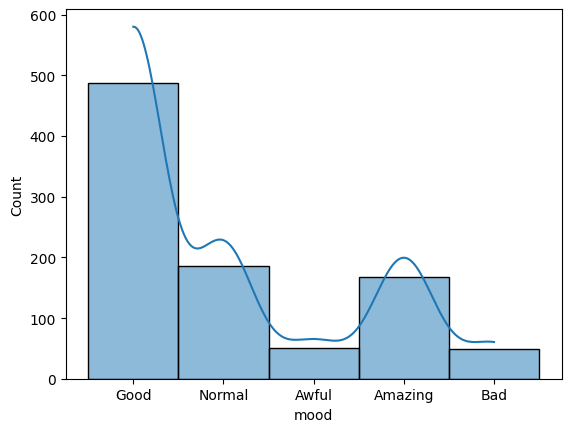

In [3]:
import seaborn as sns
sns.histplot(df.mood, kde=True)

# Naïve Bayes

In [5]:
# Show mood.csv data
print('rows & columns:', df.shape)
print(df)

rows & columns: (940, 7)
      full_date    date    weekday      time   sub_mood  \
0    16/04/2021  Apr-16     Friday   8:00 pm       yolo   
1    15/04/2021  Apr-15   Thursday   2:37 am   focused    
2    14/04/2021  Apr-14  Wednesday   2:39 am  confused    
3    13/04/2021  Apr-13    Tuesday   2:38 am  wondering   
4    12/04/2021  Apr-12     Monday   9:52 pm      angry   
..          ...     ...        ...       ...        ...   
935  04/02/2018  Feb-04     Sunday   8:19 pm       yolo   
936  04/02/2018  Feb-04     Sunday  11:23 am        meh   
937  04/02/2018  Feb-04     Sunday   6:34 am   blessed    
938  03/02/2018  Feb-03   Saturday   7:52 pm      angry   
939  03/02/2018  Feb-03   Saturday   3:12 pm        meh   

                                            activities    mood  
0    reading | Art | prayer | fasting  | walk | med...    Good  
1    reading | learning  | Art | prayer | fasting  ...    Good  
2    reading | learning  | prayer | fasting  | Qura...  Normal  
3    r

In [6]:
# Preprocess Text
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

df['activities'] = df['activities'].str.replace('|','', regex = True) # remove | symbol
#print(df)

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

X = df.activities
y = df.mood
#print('X.head()\n', X.head())
#print('y[:10]\n', y[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(752,)

In [8]:
# apply tfidf vectorizer
# NOTE: ONLY WORKS WHEN PREPROCESSED TEXT, TRAIN & TEST IS RUN FIRST IN SEQUENTIAL ORDER
X_train = vectorizer.fit_transform(X_train.values.astype('U')) # convert to unicode
X_test = vectorizer.transform(X_test.values.astype('U'))        

In [9]:
# print results of training
print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

train size: (752, 67)
[[0.         0.15019743 0.15019743 0.         0.         0.
  0.         0.         0.         0.2175581  0.         0.
  0.         0.         0.1642238  0.50433889 0.         0.14565226
  0.         0.         0.         0.         0.         0.31337414
  0.         0.         0.         0.         0.14565226 0.15131136
  0.         0.         0.18460079 0.         0.15779443 0.
  0.18747328 0.         0.         0.         0.18460079 0.18304056
  0.27127402 0.         0.         0.15334887 0.         0.
  0.15403755 0.         0.         0.17388436 0.21581341 0.12754859
  0.         0.         0.         0.         0.15779443 0.
  0.15636869 0.15403755 0.         0.         0.         0.
  0.11832317]
 [0.         0.23425352 0.23425352 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.25612957 0.         0.         0.2271647
  0.         0.         0.         0.         0.         0.48875001
  0.     

In [10]:
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [14]:
# priors
import math
#print(prior_p)
prior_p = sum(y_train == 1)/len(y_train)
print('prior spam:', prior_p)
print('log of prior: math.log(prior_p) // Causes ERROR becasue prior_p = ', prior_p)

# the model prior matches the prior calculated above
print('Works for some reason: naive_bayes.class_log_prior_[1]:', naive_bayes.class_log_prior_[1])


prior spam: 0.0
log of prior: math.log(prior_p) // Causes ERROR becasue prior_p =  0.0
Works for some reason: naive_bayes.class_log_prior_[1]: -2.838546690031579


In [12]:
# log likelihood of words given the class
naive_bayes.feature_log_prob_

array([[-4.16347267, -3.5532849 , -3.5532849 , -4.6431644 , -4.62159465,
        -4.67985411, -4.77620249, -4.79744503, -4.5656982 , -3.76060033,
        -6.40407268, -4.43983587, -4.79893524, -4.81605954, -3.54433196,
        -5.48430239, -5.71176044, -3.4466665 , -6.40407268, -5.31839937,
        -6.40407268, -5.3973735 , -6.01195641, -3.94398799, -4.43709245,
        -3.80218097, -4.21810316, -4.91945794, -3.4466665 , -3.50053277,
        -4.87219193, -5.01777832, -3.71319134, -4.0995438 , -3.50331618,
        -6.40407268, -3.79322979, -5.10948604, -4.34786412, -5.52646775,
        -3.71319134, -3.56360328, -4.29306962, -4.10280802, -5.38838496,
        -3.47295395, -5.57500419, -4.30929335, -3.48866061, -5.88740673,
        -6.07434385, -3.59552411, -3.61975913, -3.43251838, -4.0995438 ,
        -4.67536286, -6.40407268, -4.37627225, -3.50331618, -6.40407268,
        -3.46978308, -3.48866061, -4.21810316, -4.77620249, -4.10038793,
        -5.85950288, -3.47985996],
       [-4.12192

In [16]:
# evaluate on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))




# get 5x5 confusion matrix (multinomial categories)...more than expected
# I am confusion

[[ 0  0  0 34  2]
 [ 0  0  0  7  0]
 [ 0  0  0 13  0]
 [ 0  0  1 92  6]
 [ 0  0  0 29  4]]


#### Try again with only 2 columns this time

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, usecols=[5,6],encoding='latin-1')
df['activities'] = df['activities'].str.replace('|','', regex = True) # remove | symbol

X = df.activities
y = df.mood

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train = vectorizer.fit_transform(X_train.values.astype('U')) 
X_test = vectorizer.transform(X_test.values.astype('U'))   

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

prior_p = sum(y_train == 1)/len(y_train)
print('prior spam:', prior_p)
print('log of prior: math.log(prior_p) // Causes error becasue prior_p = ', prior_p)

print('works for some reason: naive_bayes.class_log_prior_[1]:', naive_bayes.class_log_prior_[1])

naive_bayes.feature_log_prob_

pred = naive_bayes.predict(X_test)

print("\n", confusion_matrix(y_test, pred))




# Same results as before with just 2 columns from the dataframe
# Realized the matrix is 5X5 because there are 5 types of moods possible, this checks out now

prior spam: 0.0
log of prior: math.log(prior_p) // Causes error becasue prior_p =  0.0
works for some reason: naive_bayes.class_log_prior_[1]: -2.838546690031579

 [[ 0  0  0 34  2]
 [ 0  0  0  7  0]
 [ 0  0  0 13  0]
 [ 0  0  1 92  6]
 [ 0  0  0 29  4]]


*Source: https://medium.com/mlearning-ai/confusion-matrix-for-multiclass-classification-f25ed7173e66*

True Positive 
```
X O O O O
O X O O O
O O X O O
O O O X O
O O O O X
```
True Negative
```
X O O O O
O X O O O
O O X O O
O O O X O
O O O O O
```
False Posivite
```
O O O O X
O O O O X
O O O O X
O O O O X
O O O O O
```
False Negative
```
O O O O O
O O O O O
O O O O O
O O O O O
X X X X O
```


### Classification report for the 5x5 confusion matrix

*   Precision = Accuracy of positive predicitons
*   Recall = % of positive cases caught
* F1-Score = % of positive predictions correct
* Macro Avg = simple average
* Weighted Avg = weights by # of observations in each class

Only got results for the moods Good & Normal. Not too surprising since Amazing, Awful, and Bad were all categorized as Other in the original dataset. Good is the most frequent mood which explains why it has the highest results despite the meh precision score. It's a safe default guess for the algorithm. 


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Amazing       0.00      0.00      0.00        36
       Awful       0.00      0.00      0.00         7
         Bad       0.00      0.00      0.00        13
        Good       0.53      0.93      0.67        99
      Normal       0.33      0.12      0.18        33

    accuracy                           0.51       188
   macro avg       0.17      0.21      0.17       188
weighted avg       0.34      0.51      0.38       188



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **???**

In [ ]:
print('mood size in test data:',y_test[y_test==0].shape[0])
print('activities size: ', len(y_test))
baseline = y_test[y_test==0].shape[0] / y_test.shape[0] 
print(baseline)

mood size in test data: 0
activities size:  188
0.0


In [ ]:
y_test[y_test != pred]

166    Amazing
767     Normal
722     Normal
413    Amazing
271     Normal
        ...   
414    Amazing
841       Good
463     Normal
131        Bad
326     Normal
Name: mood, Length: 92, dtype: object

## First Try

In [ ]:
for i in [153, 469, 291, 246, 110, 126, 22]:
    print(df.loc[i])

activities    learning   Art  fasting   shower  Audio books ...
mood                                                       Good
Name: 153, dtype: object
activities    fasting   walk  meditation   podcast  Audio bo...
mood                                                       Good
Name: 469, dtype: object
activities    reading  Art  Write dairy   prayer  Quran   me...
mood                                                     Normal
Name: 291, dtype: object
activities    Art  Write dairy   prayer  fasting   Quran   w...
mood                                                      Awful
Name: 246, dtype: object
activities    reading  learning   prayer  fasting   walk  sh...
mood                                                       Good
Name: 110, dtype: object
activities    learning   walk  Audio books   writing  Watchi...
mood                                                      Awful
Name: 126, dtype: object
activities    reading  learning   Art  prayer  fasting   wal...
mood              

#### Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
pred = naive_bayes.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.5106382978723404


## Second Try (lowercase 'activities')

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, usecols=[5,6],encoding='latin-1')
df['activities'] = df['activities'].str.lower().replace('|','', regex = True) # remove | symbol

X = df.activities
y = df.mood

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train = vectorizer.fit_transform(X_train.values.astype('U')) 
X_test = vectorizer.transform(X_test.values.astype('U'))   

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

prior_p = sum(y_train == 1)/len(y_train)
print('prior spam:', prior_p)
print('log of prior: math.log(prior_p) // Causes error becasue prior_p = ', prior_p)

print('works for some reason: naive_bayes.class_log_prior_[1]:', naive_bayes.class_log_prior_[1])

naive_bayes.feature_log_prob_

pred = naive_bayes.predict(X_test)

print("\n", confusion_matrix(y_test, pred))

prior spam: 0.0
log of prior: math.log(prior_p) // Causes error becasue prior_p =  0.0
works for some reason: naive_bayes.class_log_prior_[1]: -2.838546690031579

 [[ 0  0  0 34  2]
 [ 0  0  0  7  0]
 [ 0  0  0 13  0]
 [ 0  0  1 92  6]
 [ 0  0  0 29  4]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

# Making everything lower case gives the same results as first try

              precision    recall  f1-score   support

     Amazing       0.00      0.00      0.00        36
       Awful       0.00      0.00      0.00         7
         Bad       0.00      0.00      0.00        13
        Good       0.53      0.93      0.67        99
      Normal       0.33      0.12      0.18        33

    accuracy                           0.51       188
   macro avg       0.17      0.21      0.17       188
weighted avg       0.34      0.51      0.38       188



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy Score



In [29]:
from sklearn.metrics import accuracy_score
pred = naive_bayes.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.5106382978723404


## Third Try (Bernoulli)

In [31]:
from sklearn.naive_bayes import BernoulliNB
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, usecols=[5,6],encoding='latin-1')
df['activities'] = df['activities'].str.lower().replace('|','', regex = True) # remove | symbol

X = df.activities
y = df.mood

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train = vectorizer.fit_transform(X_train.values.astype('U')) 
X_test = vectorizer.transform(X_test.values.astype('U'))   

naive_bayes2 = BernoulliNB()
naive_bayes2.fit(X_train, y_train)

pred = naive_bayes2.predict(X_test)

print("\n", confusion_matrix(y_test, pred))


 [[26  1  1  7  1]
 [ 3  2  0  1  1]
 [ 2  4  0  5  2]
 [30  9  9 46  5]
 [14  6  3  7  3]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     Amazing       0.35      0.72      0.47        36
       Awful       0.09      0.29      0.14         7
         Bad       0.00      0.00      0.00        13
        Good       0.70      0.46      0.56        99
      Normal       0.25      0.09      0.13        33

    accuracy                           0.41       188
   macro avg       0.28      0.31      0.26       188
weighted avg       0.48      0.41      0.41       188



Better results withint he classification report when using Bernoulli, most likely because there is only one trial when running Bernoulli. This might oversimplify the dataset results of multiple categories because when compared to a Multinomial trial, frequency is taken into account.

### Accuracy Score

In [33]:
from sklearn.metrics import accuracy_score
pred = naive_bayes.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))

# Strange that the accuracy score is the same

accuracy score:  0.5106382978723404


# Logistic Regression


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, usecols=[5,6],encoding='latin-1')
df['activities'] = df['activities'].str.replace('|','', regex = True) # remove | symbol

# X = activities
# y = mood
X = df.activities
y = df.mood
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train = X_train.values.astype('U')
X_test = X_test.values.astype('U')
y_train = y_train.values.astype('U')
y_test = y_test.values.astype('U')


pipe1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')),
])

pipe1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg',
                 LogisticRegression(class_weight='balanced',
                                    multi_class='multinomial'))])

In [37]:
# evaluate on test data
pred = pipe1.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, pred))

print("Confusion matrix:\n", metrics.confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

     Amazing       0.42      0.58      0.49        36
       Awful       0.03      0.14      0.05         7
         Bad       0.09      0.15      0.11        13
        Good       0.70      0.32      0.44        99
      Normal       0.31      0.36      0.33        33

    accuracy                           0.36       188
   macro avg       0.31      0.31      0.29       188
weighted avg       0.51      0.36      0.39       188

Confusion matrix:
 [[21  2  1  8  4]
 [ 1  1  1  1  3]
 [ 1  2  2  2  6]
 [21 20 12 32 14]
 [ 6  6  6  3 12]]


Worse results than Naive Bayes for accuracy. However, gets false positives for every category as opposed to before. However, seems slightly more true to the actual data than before because Logistic Regression recognized some of the correct moods within the Other category based on given activites. 

#### Accuracy Score

In [42]:
import numpy as np
print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.3617021276595745


In [ ]:
probs = pipe1.predict_proba(df)
probs[:5]

array([[0.05135764, 0.20205584, 0.2670618 , 0.18254376, 0.29698096],
       [0.05135764, 0.20205584, 0.2670618 , 0.18254376, 0.29698096]])

# Neural Networks

In [52]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mood.csv', header = 0, usecols=[5,6],encoding='latin-1')
df['activities'] = df['activities'].str.replace('|','', regex = True) # remove | symbol

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords), binary=True)

# X = activities
# y = mood

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

pipe1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('neuralnet', MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 7), random_state=1)),
         ])

# Getting error? Not running with tested group?
pipe1.fit(df.activities.values.astype('U'), df.mood)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('neuralnet',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 7),
                               random_state=1, solver='lbfgs'))])

In [50]:
# evaluate on test data
pred = pipe1.predict(X_test.values.astype('U'))

from sklearn import metrics
print(metrics.classification_report(y_test, pred))

print("Confusion matrix:\n", metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

     Amazing       0.86      0.89      0.88        36
       Awful       0.25      0.14      0.18         7
         Bad       0.78      0.54      0.64        13
        Good       0.80      0.85      0.82        99
      Normal       0.55      0.55      0.55        33

    accuracy                           0.76       188
   macro avg       0.65      0.59      0.61       188
weighted avg       0.75      0.76      0.75       188

Confusion matrix:
 [[32  0  0  2  2]
 [ 0  1  2  3  1]
 [ 1  1  7  2  2]
 [ 3  2  0 84 10]
 [ 1  0  0 14 18]]


Recieved the best accuracy score with Neural Networks. Precision is the best that has been seen with all testing. However, the precision for Awful was very low, most likely because it is a rare occurance within the overall dataset. Interesting how Amazing outperformed Good despite Good appearing more in the dataset across the board.

#### Accuracy Score

In [51]:
import numpy as np
print("\nOverall accuracy: ", np.mean(pred==y_test))


Overall accuracy:  0.7553191489361702


# Final Thoughts

Logistic regression performed the worst out of all the approaches when it came to an accuracy score of 36%. When looking at the results, it was the only approach to fill in a value for all elements within the confusion matrix which I think contributed to the poor results. Many false positives and negatives. Naive Bayes had an alright accuracy score of 51%. It was odd that no matter what I tried the results for this approach always resulted the same. Not sure if that was a fault of my own or the algorithm was really just consistently giving the same results. Neural Networks gave the best results for accuracy score and overall confusion matrix. The accuracy score was 75% and that aligned very well with the classification report because the Other category for moods had greater precision than the previous two approaches. 
